In [1]:
from run_sim import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

In [2]:
# set up dataframe for collecting event data
mtd_stats, attack_stats = run_sim()

Target Node is:  82
Adversary: Start Host Scan at 0.0s.
Adversary: Processed host scan at 5.0s.
Adversary: Start Host Enum at 5.0s.
Adversary: Processed host enum at 10.0s.
Adversary: Start port scan at 10.0s.
Adversary: Processed port scan at 20.0s.
Adversary: Start vulnerability exploitation at 20.0s.
MTD: osdiversity triggered 31.3s
MTD: osdiversity deployed in the network at 31.3s.
Adversary: Processed vulnerabilities exploitation at 51.0s
Adversary: Host 0 has been compromised at 51.0s!: 
Adversary: Start Host Enum at 51.0s.
Adversary: Processed host enum at 56.0s.
Adversary: Start port scan at 56.0s.
MTD: osdiversity finished in 30.0s at 61.3s.
MTD: Interrupted port_scan at 61.3s!
MTD: IPShuffle triggered 61.5s
MTD: IPShuffle deployed in the network at 61.5s.
Adversary: Restarting with port scan operation!
Adversary: Start port scan at 63.3s.
Adversary: Processed port scan at 73.3s.
Adversary: Start vulnerability exploitation at 73.3s.
MTD: osdiversity triggered 91.9s
MTD: osdive

In [3]:
print(mtd_stats.dict())
mtd_operation_record = pd.DataFrame(mtd_stats.mtd_operation_record)

mtd_operation_record

{'Total suspended MTD': 97, 'Total triggered MTD': 327, 'Total executed MTD': 230, 'Total attack interrupted': 175}


,name,start_time,finish_time,duration
0,osdiversity,31.258407,61.299222,30.040815
1,IPShuffle,61.458273,112.069368,50.611095
2,osdiversity,91.924159,122.396616,30.472458
3,IPShuffle,122.147943,173.442123,51.294180
4,serviceDiversity,152.796959,193.321103,40.524144
...,...,...,...,...
225,CompleteTopologyShuffle,9763.616794,9834.294041,70.677247
226,HostTopologyShuffle,9853.961538,9897.191868,43.230330
227,PortShuffle,9884.220170,9924.293191,40.073021
228,CompleteTopologyShuffle,9915.405455,9985.496178,70.090722


In [4]:
# fig1 = go.Figure(go.Waterfall(x = mtd_operation_record['start_time'],
#                               y = mtd_operation_record['name'],
#                               measure = ['absolute']*100,
#                               connector = {"mode":"between", "line":{"color":"red"}}))
#
# fig1.update_layout(title = 'Time duration of MTD operations',
#                    xaxis_title = 'Time' , yaxis_title = 'MTD techniques',
#                    width = 800, height = 600)

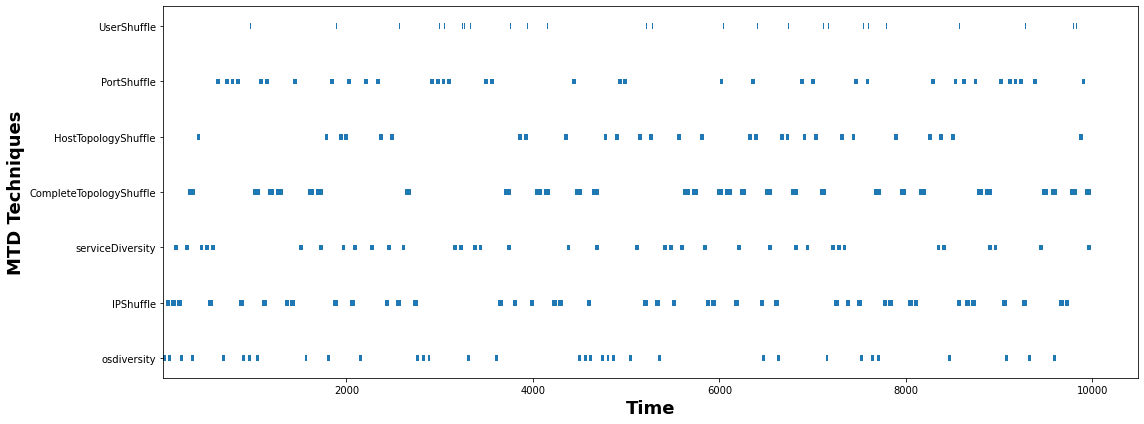

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [6]:
attack_operation_record = pd.DataFrame(attack_stats.attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts,cumulative_compromised_vulns
0,HostScan,0.000000,5.000000,5.000000,,,-1,0,0,,0,0
1,HostEnum,5.000000,10.000000,5.000000,,,-1,0,0,,0,0
2,PortScan,10.000000,20.000000,10.000000,,,0,1,0,,0,0
3,VulnerabilityExploit,20.000000,51.035411,31.035411,,,0,1,0,0,0,0
4,HostEnum,51.035411,56.035411,5.000000,,,0,1,26,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
989,PortScan,9926.293191,9936.293191,10.000000,,,154,1,612,,136,74
990,VulnerabilityExploit,9936.293191,9967.891535,31.598343,,,154,1,612,,136,74
991,BruteForce,9967.891535,9985.496178,17.604643,<simpy.resources.resource.Resource object at 0...,CompleteTopologyShuffle,154,1,612,,136,74
992,HostScan,9987.496178,9992.496178,5.000000,,,-1,2,612,,136,74


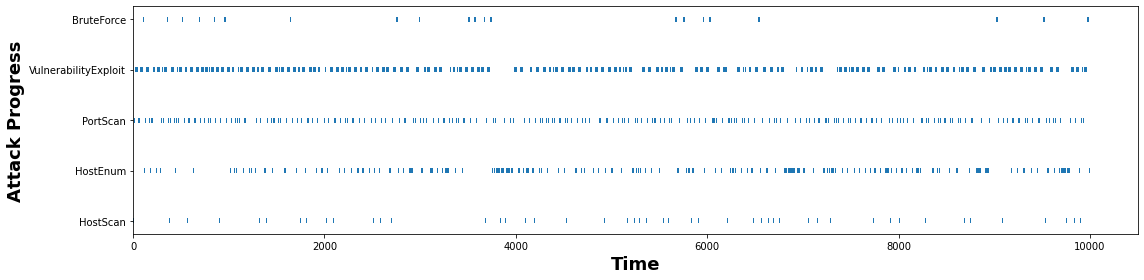

In [7]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [8]:
attack_operation_record[(attack_operation_record['name'] == 'PortScan') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts,cumulative_compromised_vulns
264,PortScan,3002.656702,3012.656702,10.0,,,48,2,391,48,32,25
289,PortScan,3247.342960,3257.342960,10.0,,,43,2,426,43,34,28
330,PortScan,3764.834530,3774.834530,10.0,,,34,3,448,34,37,30
333,PortScan,3784.834530,3794.834530,10.0,,,49,1,448,49,38,30
345,PortScan,3850.124795,3860.124795,10.0,,,55,1,448,55,40,30
439,PortScan,4694.051244,4704.051244,10.0,,,82,1,506,82,56,39
489,PortScan,5246.988217,5256.988217,10.0,,,102,1,520,102,63,43
510,PortScan,5421.625917,5431.625917,10.0,,,70,1,533,70,68,45
513,PortScan,5440.204749,5450.204749,10.0,,,80,1,533,80,69,45
545,PortScan,5784.428753,5794.428753,10.0,,,89,1,533,89,71,46


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'VulnerabilityExploit') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts,cumulative_compromised_vulns
3,VulnerabilityExploit,20.000000,51.035411,31.035411,,,0,1,0,0,0,0
12,VulnerabilityExploit,134.069368,164.337583,30.268216,,,29,2,39,29,1,1
23,VulnerabilityExploit,255.208824,285.313160,30.104337,,,24,3,58,24,2,2
34,VulnerabilityExploit,396.645894,427.004387,30.358493,,,50,1,83,50,3,3
50,VulnerabilityExploit,598.239068,629.962476,31.723408,,,20,1,134,20,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
910,VulnerabilityExploit,9207.069707,9238.276584,31.206877,,,130,1,609,130,125,69
924,VulnerabilityExploit,9348.616833,9379.614042,30.997209,,,165,1,609,165,127,70
931,VulnerabilityExploit,9419.649690,9449.742614,30.092924,,,156,1,610,156,129,71
952,VulnerabilityExploit,9642.769580,9673.532189,30.762608,,,141,1,610,141,131,72


In [10]:
attack_operation_record[(attack_operation_record['name'] == 'BruteForce') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts,cumulative_compromised_vulns


In [11]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)